<a href="https://colab.research.google.com/github/Rakesh2711/Revoultbankexam/blob/master/Revoult_Exam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import os
import pandas_profiling as pp
import seaborn as sns
# from ggplot import *
import matplotlib.pyplot as plt
from collections import Counter
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
%matplotlib inline


In [0]:
os.chdir('/content/drive/My Drive/data')

In [0]:
# # Read 4 files

device = pd.read_csv('rev-devices.csv')
notification =  pd.read_csv('rev-notifications.csv')
transaction = pd.read_csv('rev-transactions.csv')
users =  pd.read_csv('rev-users.csv')

In [4]:
transaction.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,ea_cardholderpresence,ea_merchant_mcc,ea_merchant_city,ea_merchant_country,direction,user_id,created_date
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_898,2018-04-03 03:34:21.784487
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,FALSE,4111.0,Dubai,ARE,OUTBOUND,user_1652,2019-03-19 06:15:59.537032
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,FALSE,5814.0,Dubai,ARE,OUTBOUND,user_1652,2019-03-18 18:53:41.323032
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,NaN,NaN,NaN,NaN,OUTBOUND,user_1652,2019-03-22 14:20:01.513032
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,FALSE,5651.0,Abu Dhabi,ARE,OUTBOUND,user_5509,2019-03-22 05:42:50.316652


In [5]:
users.head()

,user_id,birth_year,country,city,created_date,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals
0,user_0,1989,PL,Gdansk,2018-01-13 05:15:15.599466,1,STANDARD,1.0,1.0,3,0,0
1,user_1,1975,GB,London,2018-01-29 03:38:46.676876,0,STANDARD,NaN,NaN,21,0,0
2,user_2,1987,PL,Poznań,2018-01-18 19:17:31.229096,0,STANDARD,0.0,0.0,21,0,0
3,user_3,1994,FR,Paris,2018-01-15 18:47:56.723104,0,STANDARD,1.0,0.0,0,0,0
4,user_4,1985,GB,Beckenham,2018-01-11 00:36:46.673673,0,STANDARD,NaN,NaN,2,0,0


In [0]:
# Drpoing the columns which are having more than 40% of the data missing

for col in transaction.columns:
    if transaction[col].isna().sum()>(len(transaction)/100)*40:
        del transaction[col]

In [7]:
# Missing value imputation for users table
users['attributes_notifications_marketing_push'].value_counts(dropna=False)/len(users)*100

1.0    62.521873
NaN    34.019557
0.0     3.458569
Name: attributes_notifications_marketing_push, dtype: float64

In [8]:
users['attributes_notifications_marketing_email'].value_counts(dropna=False)/len(users)*100

1.0    59.114771
NaN    34.019557
0.0     6.865672
Name: attributes_notifications_marketing_email, dtype: float64

In [0]:
transaction['created_date'] = transaction['created_date'].astype('datetime64[ns]')
transaction['t_month'] = transaction['created_date'].dt.month

transaction['t_year'] = transaction['created_date'].dt.year

transaction['t_day'] = transaction['created_date'].dt.day

In [0]:
del transaction['created_date']
notification['created_date']=notification['created_date'].astype('datetime64[ns]')

notification['n_month'] = notification['created_date'].dt.month

notification['n_year'] = notification['created_date'].dt.year

notification['n_day'] = notification['created_date'].dt.day

# notification['n_week'] = notification['created_date'].dt.week

del notification['created_date']

In [0]:
users['created_date']=users['created_date'].astype('datetime64[ns]')

users['u_month'] = users['created_date'].dt.month

users['u_year'] = users['created_date'].dt.year

users['u_day'] = users['created_date'].dt.day

In [0]:
del users['created_date']

In [13]:
transaction.shape,users.shape

((2740075, 10), (19430, 14))

In [14]:
dfu = pd.merge(transaction,users,how='left')
print(dfu.shape)
dfu.head()

(2740075, 23)


,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,u_month,u_year,u_day
0,transaction_0,TRANSFER,AED,4.55,COMPLETED,OUTBOUND,user_898,4,2018,3,1993,GB,Belfast,0,STANDARD,1.0,1.0,1,0,0,1,2018,11
1,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_1652,3,2019,19,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1
2,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_1652,3,2019,18,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1
3,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_1652,3,2019,22,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1
4,transaction_4,CARD_PAYMENT,AED,43.81,COMPLETED,OUTBOUND,user_5509,3,2019,22,1992,PL,Siedlce,0,STANDARD,1.0,1.0,0,0,0,5,2018,18


In [15]:
notification.shape

(121813, 7)

In [16]:
dfun = pd.merge(dfu,notification,how='inner',left_on=['user_id','t_month','t_year'],right_on=['user_id','n_month','n_year'])

dfun.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,u_month,u_year,u_day,reason,channel,status,n_month,n_year,n_day
0,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_1652,3,2019,19,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1
1,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_1652,3,2019,18,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1
2,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_1652,3,2019,22,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1
3,transaction_6,CARD_PAYMENT,AED,10.44,COMPLETED,OUTBOUND,user_1652,3,2019,17,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1
4,transaction_7,CARD_PAYMENT,AED,20.83,COMPLETED,OUTBOUND,user_1652,3,2019,17,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1


In [17]:
dfun.shape

(1748606, 29)

In [18]:
dfund = pd.merge(dfun,device,on=['user_id'],how='left')

dfund.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,u_month,u_year,u_day,reason,channel,status,n_month,n_year,n_day,brand
0,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_1652,3,2019,19,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple
1,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_1652,3,2019,18,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple
2,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_1652,3,2019,22,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple
3,transaction_6,CARD_PAYMENT,AED,10.44,COMPLETED,OUTBOUND,user_1652,3,2019,17,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple
4,transaction_7,CARD_PAYMENT,AED,20.83,COMPLETED,OUTBOUND,user_1652,3,2019,17,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple


In [19]:
dfund.shape

(1748606, 30)

In [20]:
dfund.isna().sum()

transaction_id                                   0
transactions_type                                0
transactions_currency                            0
amount_usd                                       0
transactions_state                               0
direction                                        0
user_id                                          0
t_month                                          0
t_year                                           0
t_day                                            0
birth_year                                       0
country                                          0
city                                             0
user_settings_crypto_unlocked                    0
plan                                             0
attributes_notifications_marketing_push     472511
attributes_notifications_marketing_email    472511
num_contacts                                     0
num_referrals                                    0
num_successful_referrals       

In [21]:
dfund['attributes_notifications_marketing_push'].value_counts(dropna = False)

1.0    1110398
NaN     472511
0.0     165697
Name: attributes_notifications_marketing_push, dtype: int64

In [22]:
dfund['attributes_notifications_marketing_email'].value_counts(dropna = False)

1.0    994637
NaN    472511
0.0    281458
Name: attributes_notifications_marketing_email, dtype: int64

In [0]:
dfund.dropna(inplace=True)

In [24]:
dfund.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,u_month,u_year,u_day,reason,channel,status,n_month,n_year,n_day,brand
0,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_1652,3,2019,19,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple
1,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_1652,3,2019,18,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple
2,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_1652,3,2019,22,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple
3,transaction_6,CARD_PAYMENT,AED,10.44,COMPLETED,OUTBOUND,user_1652,3,2019,17,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple
4,transaction_7,CARD_PAYMENT,AED,20.83,COMPLETED,OUTBOUND,user_1652,3,2019,17,1971,ES,Espartinas,1,PREMIUM_OFFER,1.0,1.0,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple


In [0]:
# Changing the Datatypes of below variables to Integer as the responses are 0 or 1
dfund['attributes_notifications_marketing_push'] = dfund['attributes_notifications_marketing_push'].astype('int64')
dfund['attributes_notifications_marketing_email'] = dfund['attributes_notifications_marketing_email'].astype('int64')

In [26]:
dfund.dtypes

transaction_id                               object
transactions_type                            object
transactions_currency                        object
amount_usd                                  float64
transactions_state                           object
direction                                    object
user_id                                      object
t_month                                       int64
t_year                                        int64
t_day                                         int64
birth_year                                    int64
country                                      object
city                                         object
user_settings_crypto_unlocked                 int64
plan                                         object
attributes_notifications_marketing_push       int64
attributes_notifications_marketing_email      int64
num_contacts                                  int64
num_referrals                                 int64
num_successf

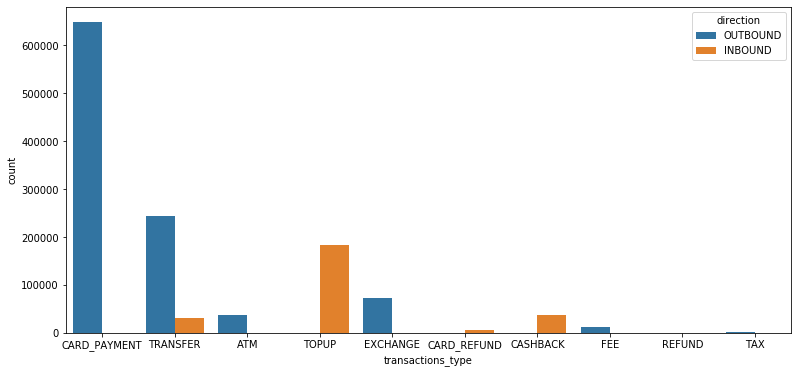

In [27]:
plt.rcParams['figure.figsize'] = 13,6
sns.countplot(x="transactions_type", hue="direction",data=dfund)
plt.show()

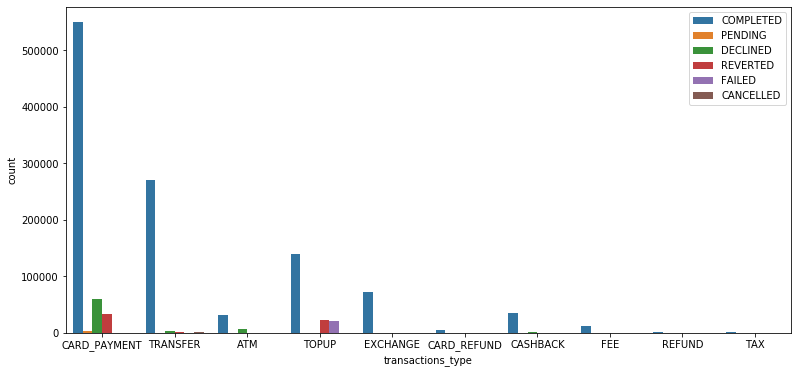

In [28]:
sns.countplot(x="transactions_type", hue="transactions_state",data=dfund)
plt.legend(loc='upper right')
plt.show()

In [0]:
df_main = dfund

In [30]:
pd.crosstab(df_main["t_year"],df_main["transactions_type"])

transactions_type,ATM,CARD_PAYMENT,CARD_REFUND,CASHBACK,EXCHANGE,FEE,REFUND,TAX,TOPUP,TRANSFER
t_year,,,,,,,,,,
2018,19063,292708,2151,7179,37273,7116,574,534,98245,107888
2019,19128,355507,3460,30432,35553,4606,332,653,86050,167643


In [31]:
df_main.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,u_month,u_year,u_day,reason,channel,status,n_month,n_year,n_day,brand
0,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_1652,3,2019,19,1971,ES,Espartinas,1,PREMIUM_OFFER,1,1,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple
1,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_1652,3,2019,18,1971,ES,Espartinas,1,PREMIUM_OFFER,1,1,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple
2,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_1652,3,2019,22,1971,ES,Espartinas,1,PREMIUM_OFFER,1,1,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple
3,transaction_6,CARD_PAYMENT,AED,10.44,COMPLETED,OUTBOUND,user_1652,3,2019,17,1971,ES,Espartinas,1,PREMIUM_OFFER,1,1,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple
4,transaction_7,CARD_PAYMENT,AED,20.83,COMPLETED,OUTBOUND,user_1652,3,2019,17,1971,ES,Espartinas,1,PREMIUM_OFFER,1,1,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple


In [32]:
df_main.groupby('brand')['transaction_id'].count()

brand
Android    612819
Apple      653385
Unknown      9891
Name: transaction_id, dtype: int64

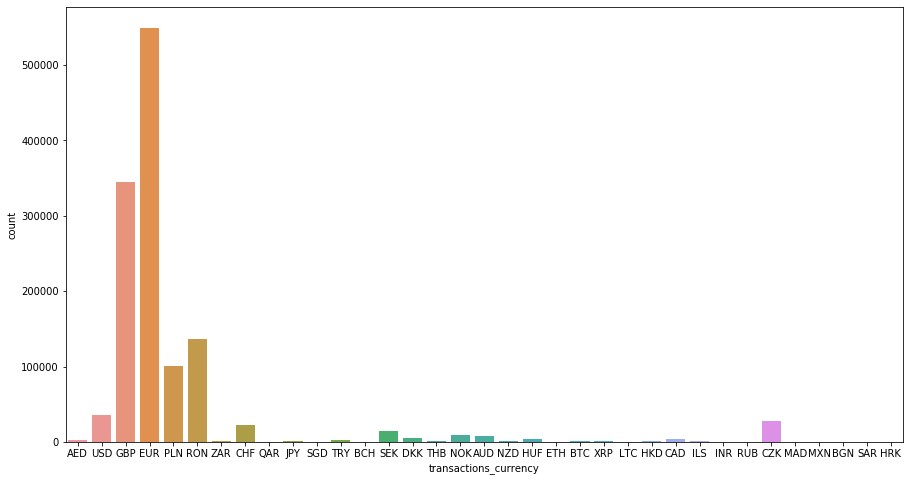

In [33]:
plt.rcParams['figure.figsize']= 15,8
sns.countplot(df_main['transactions_currency'])
plt.show()

In [34]:
df_main.groupby('user_id')['transaction_id'].count().reset_index()

,user_id,transaction_id
0,user_0,140
1,user_10,485
2,user_1000,69
3,user_10000,170
4,user_10004,128
...,...,...
10683,user_9992,31
10684,user_9994,17
10685,user_9995,531
10686,user_9996,183


In [0]:
d = df_main.groupby('user_id')['transaction_id'].count().reset_index()

d.columns = ['user_id','tran_count_each_user']

df_main = pd.merge(df_main,d,on='user_id',how='left')

del d

In [36]:
df_main.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,city,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_push,attributes_notifications_marketing_email,num_contacts,num_referrals,num_successful_referrals,u_month,u_year,u_day,reason,channel,status,n_month,n_year,n_day,brand,tran_count_each_user
0,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_1652,3,2019,19,1971,ES,Espartinas,1,PREMIUM_OFFER,1,1,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple,342
1,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_1652,3,2019,18,1971,ES,Espartinas,1,PREMIUM_OFFER,1,1,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple,342
2,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_1652,3,2019,22,1971,ES,Espartinas,1,PREMIUM_OFFER,1,1,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple,342
3,transaction_6,CARD_PAYMENT,AED,10.44,COMPLETED,OUTBOUND,user_1652,3,2019,17,1971,ES,Espartinas,1,PREMIUM_OFFER,1,1,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple,342
4,transaction_7,CARD_PAYMENT,AED,20.83,COMPLETED,OUTBOUND,user_1652,3,2019,17,1971,ES,Espartinas,1,PREMIUM_OFFER,1,1,13,0,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple,342


In [0]:
#  pp.ProfileReport(df_main)

In [0]:
# transaction_id has a high cardinality: 328937 distinct values Warning
# amount_usd has 7101 / 2.1% zeros Zeros
# amount_usd is highly skewed (γ1 = 582.86) Skewed
# user_id has a high cardinality: 2334 distinct values Warning
# city has a high cardinality: 1254 distinct values Warning
# num_contacts has 50315 / 14.8% zeros Zeros
# num_referrals has constant value 0 Rejected
# num_successful_referrals has constant value 0 Rejected
# Dataset has 541 duplicate rows Warning
# attributes_notifications_marketing_email is highly correlated 
#with attributes_notifications_marketing_push (ρ = 0.92296)

In [0]:
df_main.drop(['num_contacts','num_referrals','city','attributes_notifications_marketing_push'],axis=1,inplace=True)

df_main.drop_duplicates(inplace=True)

In [40]:
df_main.head()

,transaction_id,transactions_type,transactions_currency,amount_usd,transactions_state,direction,user_id,t_month,t_year,t_day,birth_year,country,user_settings_crypto_unlocked,plan,attributes_notifications_marketing_email,num_successful_referrals,u_month,u_year,u_day,reason,channel,status,n_month,n_year,n_day,brand,tran_count_each_user
0,transaction_1,CARD_PAYMENT,AED,15.50,COMPLETED,OUTBOUND,user_1652,3,2019,19,1971,ES,1,PREMIUM_OFFER,1,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple,342
1,transaction_2,CARD_PAYMENT,AED,43.40,COMPLETED,OUTBOUND,user_1652,3,2019,18,1971,ES,1,PREMIUM_OFFER,1,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple,342
2,transaction_3,TRANSFER,AED,10043.01,COMPLETED,OUTBOUND,user_1652,3,2019,22,1971,ES,1,PREMIUM_OFFER,1,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple,342
3,transaction_6,CARD_PAYMENT,AED,10.44,COMPLETED,OUTBOUND,user_1652,3,2019,17,1971,ES,1,PREMIUM_OFFER,1,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple,342
4,transaction_7,CARD_PAYMENT,AED,20.83,COMPLETED,OUTBOUND,user_1652,3,2019,17,1971,ES,1,PREMIUM_OFFER,1,0,3,2018,1,JOINING_ANNIVERSARY,PUSH,SENT,3,2019,1,Apple,342


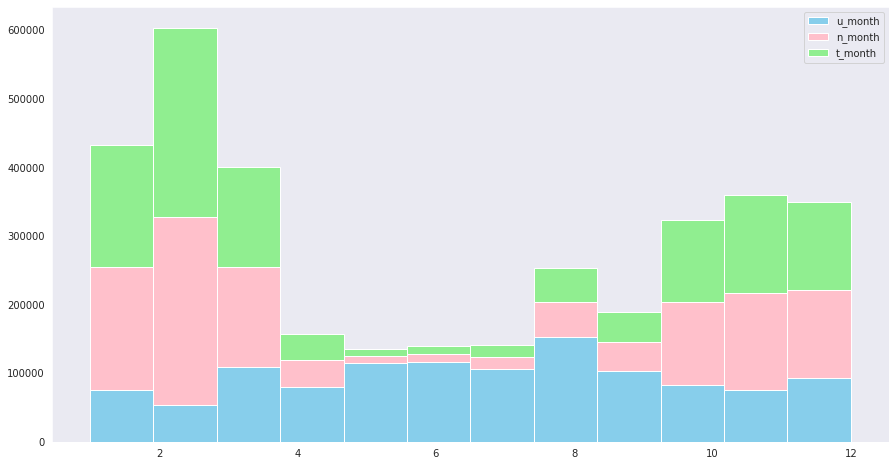

In [41]:
# Monthwise user creations,user notifications ,user transactions 
sns.set_style('dark')
mylevels = ['u_month','n_month','t_month']
plt.hist([df_main['u_month'],df_main['n_month'],df_main['t_month']],stacked=True,bins=12,rwidth=1,label=mylevels, color = ["skyblue",'pink','lightgreen'])
plt.legend()
plt.show()

In [0]:
# pd.crosstab(df_main["t_month"],df_main["tran_count_each_user"])

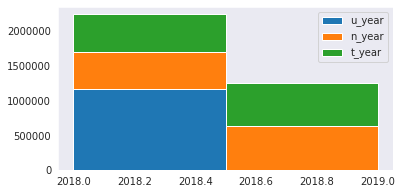

In [43]:
#Per Year user creations,user notifications ,user transactions
#We can see we dnt have the data in 2019 which have users created
plt.rcParams['figure.figsize']=6,3 
sns.set_style('dark')
mylevels = ['u_year','n_year','t_year']
plt.hist([df_main['u_year'],df_main['n_year'],df_main['t_year']],stacked=True,bins=2,rwidth=1,label=mylevels)
plt.legend()
plt.show()



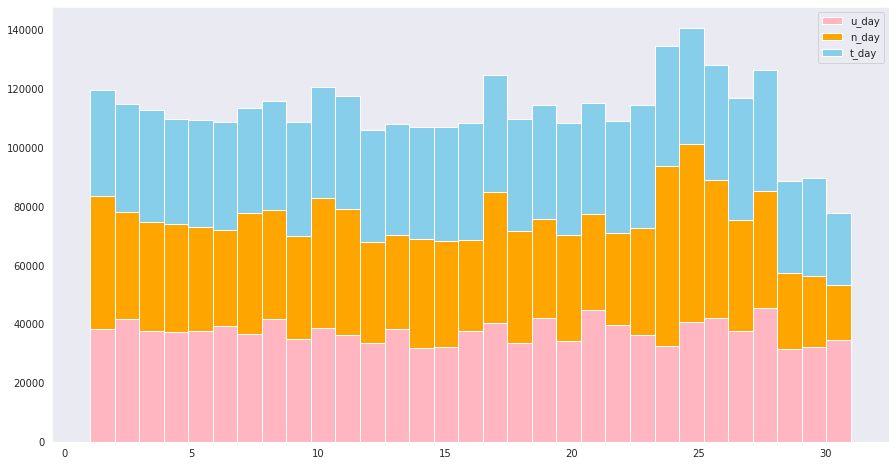

In [44]:
# Per Day user creations,user notifications ,user transactions 
plt.rcParams['figure.figsize']=15,8
sns.set_style('dark')
mylevels = ['u_day','n_day','t_day']
plt.hist([df_main['u_day'],df_main['n_day'],df_main['t_day']],stacked=True,bins=31,rwidth=1,label=mylevels, color = ["lightpink",'orange','skyblue'])
plt.legend()
plt.show()

In [45]:
# Transaction made by each user each month
d = df_main.groupby(['user_id','t_month','t_year'])['transaction_id'].count().reset_index()

d.head()

,user_id,t_month,t_year,transaction_id
0,user_0,1,2019,7
1,user_0,2,2019,84
2,user_0,10,2018,27
3,user_0,11,2018,12
4,user_0,12,2018,10


In [46]:
# Transaction made by each user each month
d1 = df_main.groupby(['user_id','u_year','u_month','t_year','t_month'])['transaction_id'].count().reset_index()

d1.head(20)

,user_id,u_year,u_month,t_year,t_month,transaction_id
0,user_0,2018,1,2018,10,27
1,user_0,2018,1,2018,11,12
2,user_0,2018,1,2018,12,10
3,user_0,2018,1,2019,1,7
4,user_0,2018,1,2019,2,84
5,user_10,2018,1,2018,11,82
6,user_10,2018,1,2019,1,297
7,user_10,2018,1,2019,2,49
8,user_10,2018,1,2019,3,57
9,user_1000,2018,1,2018,1,69


In [47]:
# We can see here most of the users are created in 2018 and only 1887 were created in 2019
df_main.groupby(['u_year','u_month'])['user_id'].count()

u_year  u_month
2018    1           73741
        2           52961
        3          108856
        4           80434
        5          115271
        6          116739
        7          106031
        8          152154
        9          102721
        10          82723
        11          74842
        12          93077
2019    1            1887
Name: user_id, dtype: int64

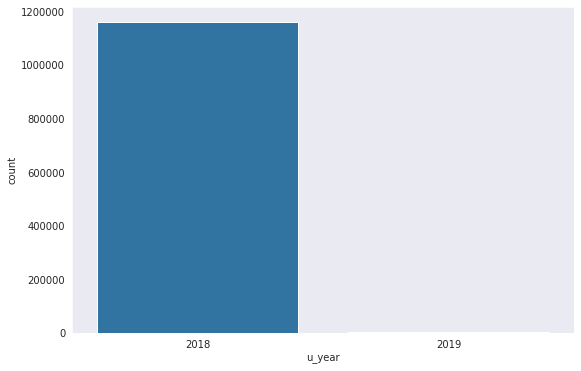

In [48]:
plt.rcParams['figure.figsize'] = 9,6
sns.countplot(df_main['u_year'])
plt.show()

In [49]:
d2 = df_main.groupby(['user_id','u_year','u_month','t_year','t_month'])['transaction_id'].count().reset_index()

d2.head(10)

,user_id,u_year,u_month,t_year,t_month,transaction_id
0,user_0,2018,1,2018,10,27
1,user_0,2018,1,2018,11,12
2,user_0,2018,1,2018,12,10
3,user_0,2018,1,2019,1,7
4,user_0,2018,1,2019,2,84
5,user_10,2018,1,2018,11,82
6,user_10,2018,1,2019,1,297
7,user_10,2018,1,2019,2,49
8,user_10,2018,1,2019,3,57
9,user_1000,2018,1,2018,1,69


# Define a target metric to measure user engagement. How would you define an ​engaged vs. ​unengaged​ user?

# If user was created in 2018 and he has not done much transaction in 2018 and 2019 he will treated as unengaged user if so he is engaged user.

# These are the users which are identified as unengaged users as there numbers of trasactions are less  than 1 transactions per month

In [50]:
# These are the users which are identified as unengaged users as there numbers of trasactions are less  than 1 transactions per month
unengaged_users = d2[d2['transaction_id']<12]

unengaged_users.head()

,user_id,u_year,u_month,t_year,t_month,transaction_id
2,user_0,2018,1,2018,12,10
3,user_0,2018,1,2019,1,7
11,user_10000,2018,8,2018,11,10
12,user_10000,2018,8,2019,1,10
14,user_10000,2018,8,2019,3,9


In [51]:
unengaged_users.isna().sum()

user_id           0
u_year            0
u_month           0
t_year            0
t_month           0
transaction_id    0
dtype: int64

In [0]:
unengaged_users_list = unengaged_users['user_id']

In [53]:
[(count,userid) for (count,userid) in enumerate(unengaged_users_list)]

[(0, 'user_0'),
 (1, 'user_0'),
 (2, 'user_10000'),
 (3, 'user_10000'),
 (4, 'user_10000'),
 (5, 'user_10004'),
 (6, 'user_10004'),
 (7, 'user_10004'),
 (8, 'user_10005'),
 (9, 'user_10009'),
 (10, 'user_10011'),
 (11, 'user_10011'),
 (12, 'user_10011'),
 (13, 'user_10012'),
 (14, 'user_10013'),
 (15, 'user_10013'),
 (16, 'user_10013'),
 (17, 'user_10013'),
 (18, 'user_10014'),
 (19, 'user_10014'),
 (20, 'user_10014'),
 (21, 'user_10015'),
 (22, 'user_10017'),
 (23, 'user_10017'),
 (24, 'user_10021'),
 (25, 'user_10021'),
 (26, 'user_10021'),
 (27, 'user_10022'),
 (28, 'user_10024'),
 (29, 'user_10025'),
 (30, 'user_10027'),
 (31, 'user_10027'),
 (32, 'user_10028'),
 (33, 'user_10030'),
 (34, 'user_10032'),
 (35, 'user_10032'),
 (36, 'user_10032'),
 (37, 'user_10032'),
 (38, 'user_10032'),
 (39, 'user_10033'),
 (40, 'user_10034'),
 (41, 'user_10037'),
 (42, 'user_10038'),
 (43, 'user_10038'),
 (44, 'user_10038'),
 (45, 'user_10040'),
 (46, 'user_10042'),
 (47, 'user_10042'),
 (48, 'use

**# IF the user was created in 2018 and we have data till 2019 still if he has done total trnsacation less than 12 will be considered as unengaged**

In [0]:
# IF the user was created in 2018 and we have data till 2019 still if he has done total trnsacation less than 12 will be considered as unengaged
df_main[(df_main['tran_count_each_user']<=12) & (df_main['u_year']==2018)]


In [0]:
df_main_new = df_main

***Unengaged =1 Engaged =0***

In [0]:
# Unengaged =1 Engaged =0
df_main_new['engagedORUnengaged'] = np.where((df_main_new['tran_count_each_user']<=12) & (df_main_new['u_year']==2018),1 ,0)

In [0]:
df_main_new['engagedORUnengaged'].value_counts()

In [0]:
sns.countplot(df_main_new['engagedORUnengaged'])

*** 

1.   Our Dataset is Highly Skewed so that needs to be treated first 
2.   Our Data has catagorical variables that needs to be converted to numerical

***

In [0]:
df_main_new.dtypes

In [0]:
# Sepearting catagorical and numerical columns 

cat_columns = [col for col in df_main_new.select_dtypes('object') if col not in ['transaction_id','user_id','city']]

num_columns =df_main_new.select_dtypes(['float64','int64']).columns

print(cat_columns)

print('\n')

print(num_columns)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc,roc_auc_score,accuracy_score,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

In [0]:
#Checking the correlation of each variables

colormap = plt.cm.magma
plt.figure(figsize=(16,12))
plt.title('Pearson correlation of continuous features', y=1.05, size=15)
sns.heatmap(df_main_new.corr(),linewidths=0.1,vmax=1.0, square=True, 
            cmap=colormap, linecolor='white', annot=True)

In [0]:
# We can see t_month and n_month is highly correlated so will drop one of those

df_main_new.num_successful_referrals.value_counts()

In [0]:
df_main_new.drop(['num_successful_referrals','t_year','t_month'],1,inplace=True)

In [0]:
df_main_new.head()

In [0]:
df_main_new.columns

In [0]:
#we have to drop the column transaction_id,user_id,city due to very high cardinality

del df_main_new['transaction_id']
del df_main_new['user_id']

In [0]:
df_main_new.head()

In [0]:
from sklearn.model_selection import train_test_split
df_train ,df_test = train_test_split(df_main_new,test_size =0.2,random_state=2)

In [0]:
# you can use following method if you want to ignore categories with too low frequencies , 
# ignoring categories with low frequencies however will result in fewer columns without 
# affecting model performance too much .

for col in cat_columns:
    freqs=df_train[col].value_counts()
    k=freqs.index[freqs>10000][:-1]
    for cat in k:
        name=str(col)+'_'+str(cat)
        df_train[name]=(df_train[col]==cat).astype(int)
    del df_train[col]
    print(col)

In [0]:
Counter(df_train.dtypes.values)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0,verbose=20)
rf.fit(df_train.drop(['engagedORUnengaged'],axis=1), df_train['engagedORUnengaged'])
features = df_train.drop(['engagedORUnengaged'],axis=1).columns.values
print("----- Training Done -----")

In [0]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from plotly.offline import init_notebook_mode, iplot
# configure_plotly_browser_state()
init_notebook_mode(connected=False)
%matplotlib inline

In [0]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [0]:
configure_plotly_browser_state()
trace = go.Scatter(
    y = rf.feature_importances_,
    x = features,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = rf.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    text = features
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'Random Forest Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig,filename='scatter2010')

In [0]:
list(zip(*sorted(zip(rf.feature_importances_, df_train.columns),reverse =True)))

In [0]:
list(zip(df_train.columns,rf.feature_importances_))